In [ ]:
##✅ Step 0: Upload file from your PC to Colab
from google.colab import files
uploaded = files.upload()

# After upload, you can load it with pandas
import pandas as pd
df = pd.read_csv("data.csv")


Saving data.csv to data (1).csv


In [ ]:
##✅ Step 1: Load Dataset
# Explore dataset
print("First five rows:")
print(df.head())

print("\nShape of dataset:", df.shape)


First five rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_

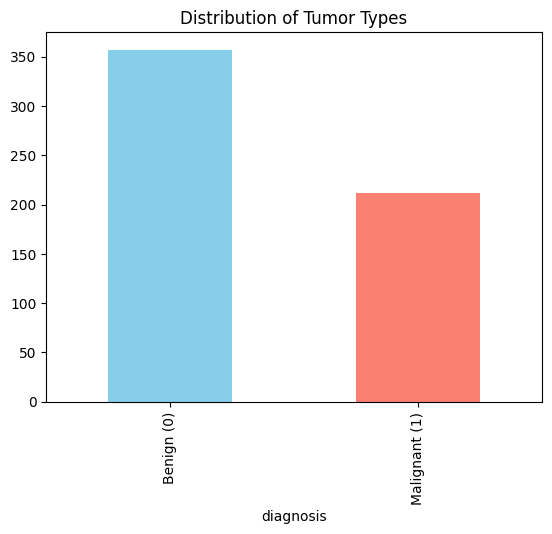

In [ ]:
##✅ Step 2: Preprocess & Visualize the Data
# Drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'])

# Encode diagnosis: M -> 1, B -> 0
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

# Plot distribution
import matplotlib.pyplot as plt
df['diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0,1], ['Benign (0)', 'Malignant (1)'])
plt.title('Distribution of Tumor Types')
plt.show()


In [ ]:
##✅ Step 3: Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)


In [ ]:
##✅ Step 4: Train Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

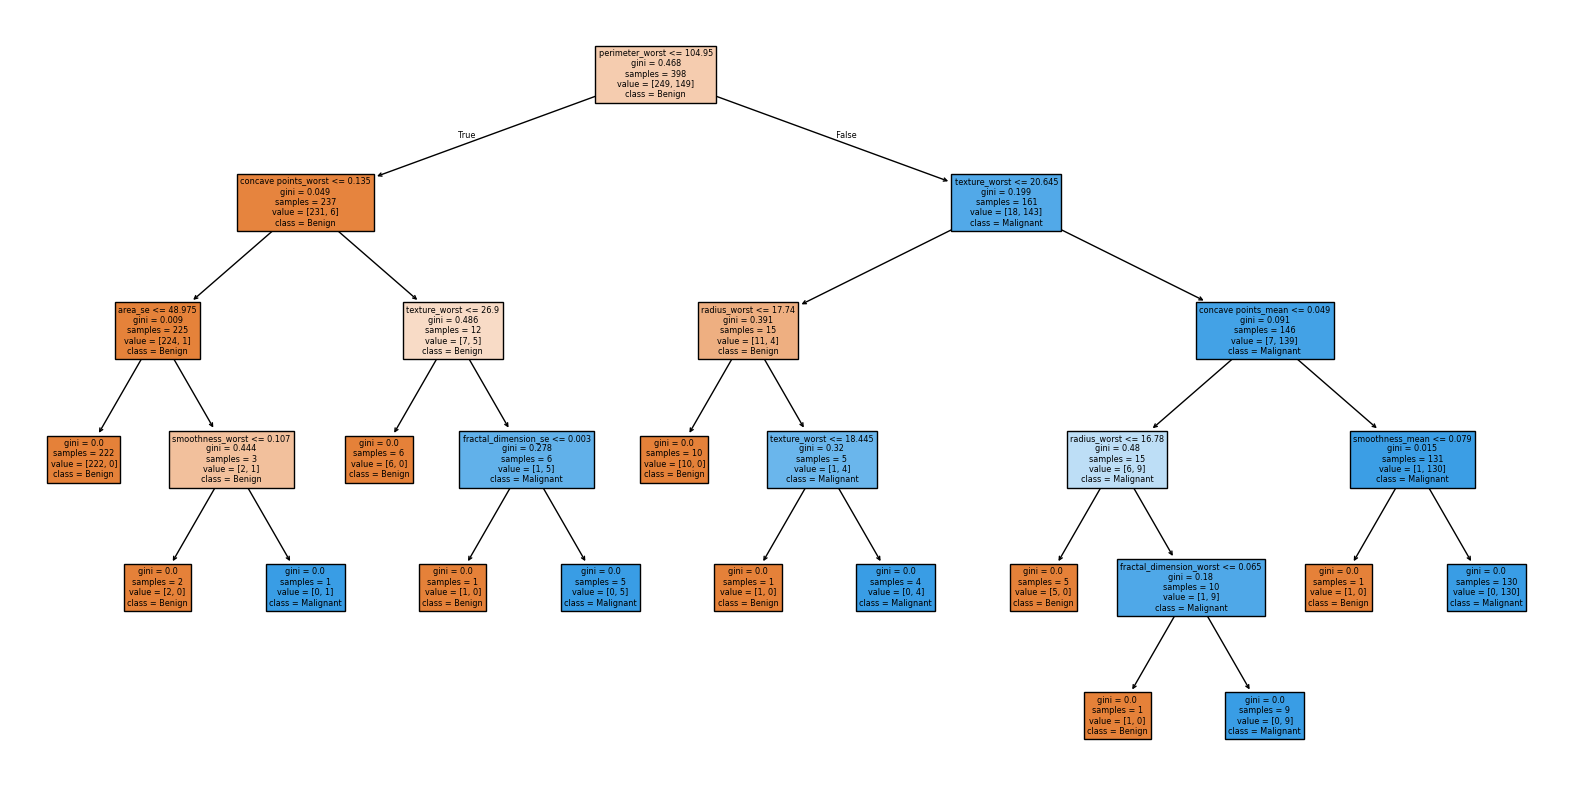

In [ ]:
##✅ Step 5: Visualize the Tree
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Benign','Malignant'])
plt.show()


In [ ]:
##✅ Step 6: Make Predictions
y_pred = clf.predict(X_test)
print("Predictions on test set:", y_pred[:10])
print("Actual values:", y_test.values[:10])


Predictions on test set: [0 1 0 1 0 1 0 0 0 0]
Actual values: [0 1 0 1 1 1 1 1 0 0]


In [ ]:
##✅ Step 7: Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Benign','Malignant']))




Accuracy: 92.98%

Confusion Matrix:
 [[108   0]
 [ 12  51]]

Classification Report:
               precision    recall  f1-score   support

      Benign       0.90      1.00      0.95       108
   Malignant       1.00      0.81      0.89        63

    accuracy                           0.93       171
   macro avg       0.95      0.90      0.92       171
weighted avg       0.94      0.93      0.93       171



In [ ]:
##✅ Step 8: Compare Gini vs Entropy
# Gini
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=1)
clf_gini.fit(X_train, y_train)
acc_gini = accuracy_score(y_test, clf_gini.predict(X_test))

# Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf_entropy.fit(X_train, y_train)
acc_entropy = accuracy_score(y_test, clf_entropy.predict(X_test))

print("Accuracy with Gini:", acc_gini)
print("Accuracy with Entropy:", acc_entropy)


Accuracy with Gini: 0.9298245614035088
Accuracy with Entropy: 0.9122807017543859
